<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C4_Correlacion_Reg_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coeficiente de correlación de Pearson

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
import numpy as np

El coeficiente de correlación de Pearson cuantifica la correlación entre dos variables numéricas. Dos variables tienen una correlación si tienen cierta dependencia la una de la otra. Este coeficiente sólo mide las relaciones lineales, es decir, que pueden ser representadas con una línea.

El rango de valores posibles es el intervalo entre -1 y 1
Un valor de -1 significa que hay una correlación negativa perfecta. Esto quiere decir que el aumento de una variable resulta en la disminución de la otra; y viceversa. Podemos graficar la relación entre dos variables con una gráfica de dispersión, o scatterplot, donde cada punto representa la intersección entre un valor de la variable x y un valor de la variable y.

##Relación Negativa

. Si unimos los puntos con una línea que representa la relación entre las dos variables, una correlación de -1 se vería de la siguiente manera:

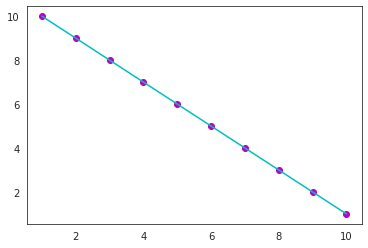

In [5]:
arr_1_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr_1_2 = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

plt.scatter(arr_1_1, arr_1_2, c='m');
plt.plot(arr_1_1, arr_1_2, c='c');

#Relación Positiva


Un valor de 1 significa que hay una correlación positiva perfecta. Esto quiere decir que el aumento de una variable resulta en el aumento de la otra; y la disminución de una variable resulta en la disminución de la otra. Esta relación se vería de la siguiente manera:

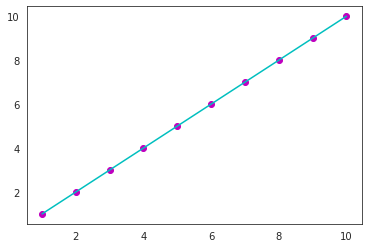

In [9]:
arr_2_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr_2_2 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.scatter(arr_2_1, arr_2_2, c='m');
plt.plot(arr_2_1, arr_2_2, c='c');

#Sin relación


En cambio, un valor de 0 implica que no existe ninguna correlación entre las variables. Son completamente independientes la una de la otra. Si cada muestra es un punto formado por un valor de la variable x y un valor de la variable y, podríamos visualizar esta falta de relación de esta manera:

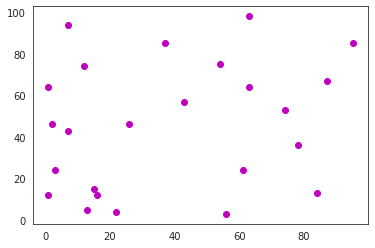

In [6]:
arr_3_1 = pd.Series([1, 7, 1, 22, 54, 2, 7, 26, 3, 13, 37, 87, 63, 15, 16, 74, 56, 95, 78, 61, 12, 43, 63, 84])
arr_3_2 = pd.Series([64, 43, 12, 4, 75, 46, 94, 46, 24, 5, 85, 67, 98, 15, 12, 53, 3, 85, 36, 24, 74, 57, 64, 13])

plt.scatter(arr_3_1, arr_3_2, c='m');

##Corelacion  de Pearson con pandas

In [7]:
print(f'Correlación entre las primeras dos Series: {arr_1_1.corr(arr_1_2)}')

Correlación entre las primeras dos Series: -0.9999999999999999


In [10]:
print(f'Correlación entre las segundas dos Series: {arr_2_1.corr(arr_2_2)}')

Correlación entre las segundas dos Series: 0.9999999999999999


In [11]:
print(f'Correlación entre las terceras dos Series: {arr_3_1.corr(arr_3_2)}')

Correlación entre las terceras dos Series: 0.22134946355611293


##Conclusión

las relaciones entre variables en el mundo real nunca son tan evidentes y perfectas como éstas. El coeficiente de correlación de Pearson simplemente nos ayuda a distinguir la naturaleza de la correlación (si es negativa, positiva o inexistente) y la fuerza de la correlación (qué tan cerca o lejos está de -1 o 1). Este coeficiente no tiene dirección, es decir, si la variable a y la variable b tienen un coeficiente de 8, podemos interpretarlo como que un aumento en la variable a implica comunmente un aumento de la variable b, y también podemos decir que un aumento en la variable b implica comunmente un aumento en la variable a.


- La correlación no implica necesariamente causalidad.

Es decir, el hecho de que haya una correlación alta entre dos variables no significa que una de las variables cause a la otra. Incluso podría suceder que la correlación se deba al azar y en realidad las variables son totalmente independientes la una de la otra.

- El coeficiente de correlación es muy sensible a valores atípicos.

Si hay valores atípicos en nuestro conjunto de datos, esto puede cambiar drásticamente el valor de nuestro coeficiente. Es por eso que siempre es importante trabajar con nuestros valores atípicos antes de investigar la relación entre las variables.

#Matriz  de Correlacion y mapas de Color 

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto diabetes-clean.csv',index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Antes de aplicarlo, removeré la variable dependiente ('outcome'), dado que es una variable binaria no apta para este tipo de análisis.

In [13]:
df_filtered = df.drop(columns=['outcome'])

In [14]:
df_filtered.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


n par de cosas que podemos observar es que:

Hay una diagonal de 1s a la mitad de la matriz, donde cada variable se relaciona consigo misma.
Hay redundancia de datos debajo y arriba de la diagonal.
Usemos ahora un mapa de calor para visualizar esta matriz de una manera más fácil de interpretar:

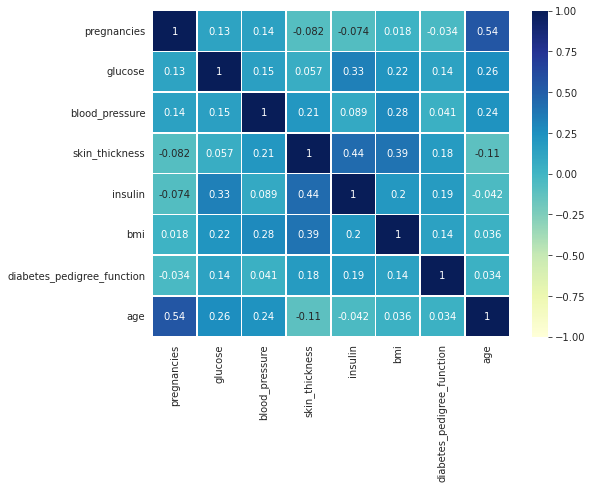

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

¿Qué variables tienen correlaciones negativas? ¿Qué variables tienen correlaciones positivas? ¿Qué variables no tienen correlación?

Recuerda que estamos cuantificando la relación lineal entre dos variables. Esto significa que podría existir algún tipo de relación no lineal que no estamos visualizando con este mapa.

#Gráficas de Dispesión 

Vimos que insulina y glucosa tenían una correlación positiva de 0.33. Esta correlación lineal es bastante débil en realidad. Así se ven ambas variables en una gráfica de dispersión:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


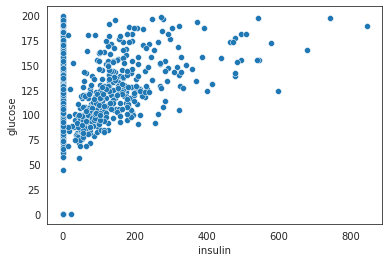

In [16]:
sns.scatterplot(df['insulin'], df['glucose']);

In [17]:
df['insulin'].corr(df['glucose'])

0.33135710992020934

Podemos ver algo curioso en esta gráfica: En el valor 0 de 'insulin', podemos observar que los valores 'glucose' encontrados abarcan todo el rango posible. Esto es algo extraño. A menos que uno de ustedes sea doctor y sepa que esto tiene sentido, creo que podríamos elaborar la hipótesis de que los valores 0 en 'insulin' representan una falta de datos o un error de medición y no un valor real. Esta hipótesis la podemos elaborar simplemente al observar que la gráfica tiene una anomalía en ese lugar. Veamos qué pasa si removemos los valores 0 en 'insulin':

In [18]:
df_no_zeros = df[df['insulin'] > 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


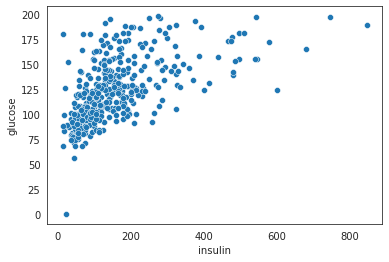

In [19]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['glucose'])

In [20]:
df_no_zeros['insulin'].corr(df_no_zeros['glucose'])

0.5800099317152834

Interesante, ¿no crees? Obviamente para realizar una hipótesis coherente necesitaríamos ser médicos (si alguien es médico aquí, por favor demuestre que hemos cometido un grave error), pero como puedes ver, tan sólo con visualizar la relación entre estos dos datos ya vimos algunas preguntas emerger.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


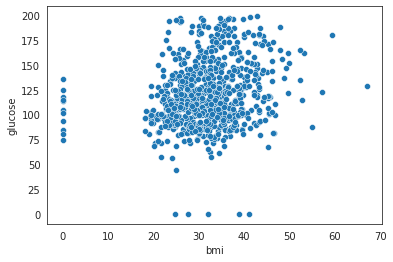

In [21]:
#Veamos qué hay entre las variables 'bmi' y 'glucose':

sns.scatterplot(df['bmi'], df['glucose'])

In [22]:
df['bmi'].corr(df['glucose'])

0.22107106945898294

Otra vez tenemos este fenómeno extraño donde hay algunos valores en 0 que seguramente están ahí por error. También vamos a realizar una pequeña apuesta y eliminar algunos valores de 'bmi' que parecen ser atípicos. Veamos cómo cambia nuestra gráfic

In [23]:
bmi_greater_than_zero = (df['bmi'] > 0) & (df['bmi'] < 55)
glucose_greater_than_zero = df['glucose'] > 0
df_no_zeros_2 = df[bmi_greater_than_zero & glucose_greater_than_zero]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


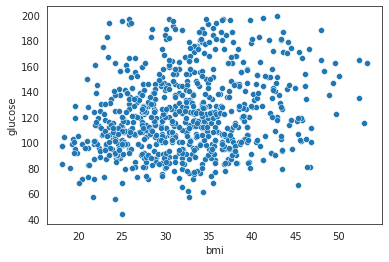

In [24]:
sns.scatterplot(df_no_zeros_2['bmi'], df_no_zeros_2['glucose']);

In [25]:
df_no_zeros_2['bmi'].corr(df_no_zeros_2['glucose'])

0.2370699403336577

En este caso nuestro coeficiente de correlación mejoró pero no mucho. Es notable que la relación entre estas dos variables es bastante débil (si es que existe).



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


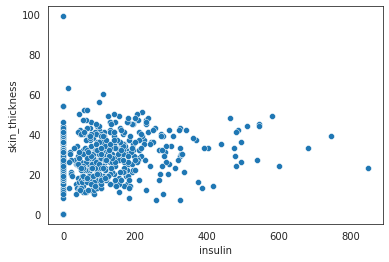

In [26]:
#Vamos a revisar 'insulin' y 'skin_thickness' que tuvieron un coeficiente de 0.44:

sns.scatterplot(df['insulin'], df['skin_thickness'])

In [27]:

df['insulin'].corr(df['skin_thickness'])

0.4367825701200126

Ya sabemos que insulin tiene valores 0 que probablemente sean erróneos, así que usaremos nuestro DataFrame df_no_zeros para eliminarlos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


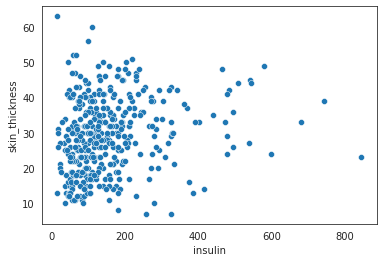

In [28]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['skin_thickness'])

In [29]:
df_no_zeros['insulin'].corr(df_no_zeros['skin_thickness'])


0.18488842018975904

¡¿Qué ha pasado aquí?! Un coeficiente de 0.4367 disminuyó a 0.1848 cuando eliminamos algunos valores que creemos son erróneos. Esto es una gran demostración de cómo nunca podemos confiar en una sola medida para realizar nuestras hipótesis. Con este dataset la verdad es que estamos explorando un poco a ciegas porque se requiere de conocimientos muy especializados para entender qué está pasando en realidad, pero resulta interesante que aún sin saber exactamente qué significan las variables, de todas maneras podemos encontrar comportamientos que generan muchas preguntas.

Otra pregunta que me interesa plantearme es si acaso la relación entre estas dos variables podría mejorar si eliminamos los valores atípicos de 'insulin':

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


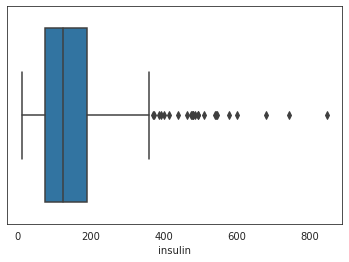

In [30]:
sns.boxplot(df_no_zeros['insulin'])

In [31]:
iqr_insulin = df_no_zeros['insulin'].quantile(0.75) - df_no_zeros['insulin'].quantile(0.25)
filter_upper_outliers = df_no_zeros['insulin'] < (df_no_zeros['insulin'].quantile(0.75) + iqr_insulin * 1.5)
df_insulin_no_outliers = df_no_zeros[filter_upper_outliers]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


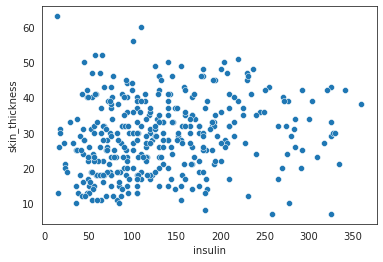

In [33]:
sns.scatterplot(df_insulin_no_outliers['insulin'], df_insulin_no_outliers['skin_thickness'])

In [34]:
df_insulin_no_outliers['insulin'].corr(df_insulin_no_outliers['skin_thickness'])

0.18403514086196654

Después de este procedimiento quedo bastante convencido de que la correlación positiva que habíamos encontrado anteriormente no era real. Ojalá y esto haya sido una demostración del cuidado que debemos de tener al explorar nuestras variables y las relaciones entre ellas.

#Pairplots

In [35]:

no_outcome = df.drop(columns=['outcome'])

In [36]:
no_zeros = no_outcome[no_outcome > 0]

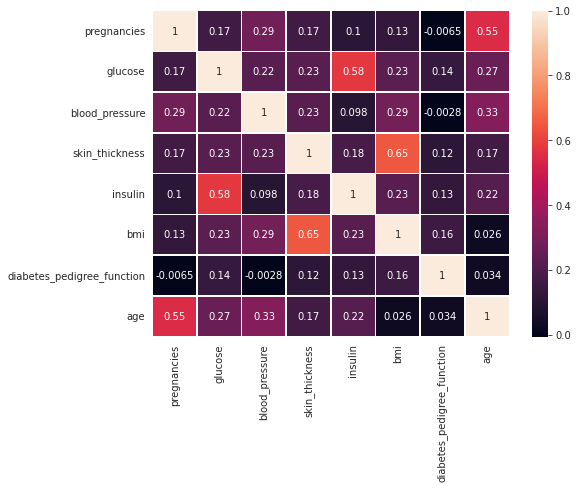

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(no_zeros.corr(), annot=True, linewidths=.5);

Viendo nuestra matriz, vemos que hay 3 relaciones que parecen ser más o menos relevantes:

'insulin' vs 'glucose'
'skin_thickness' vs 'bmi'
'age' vs 'pregnancies'

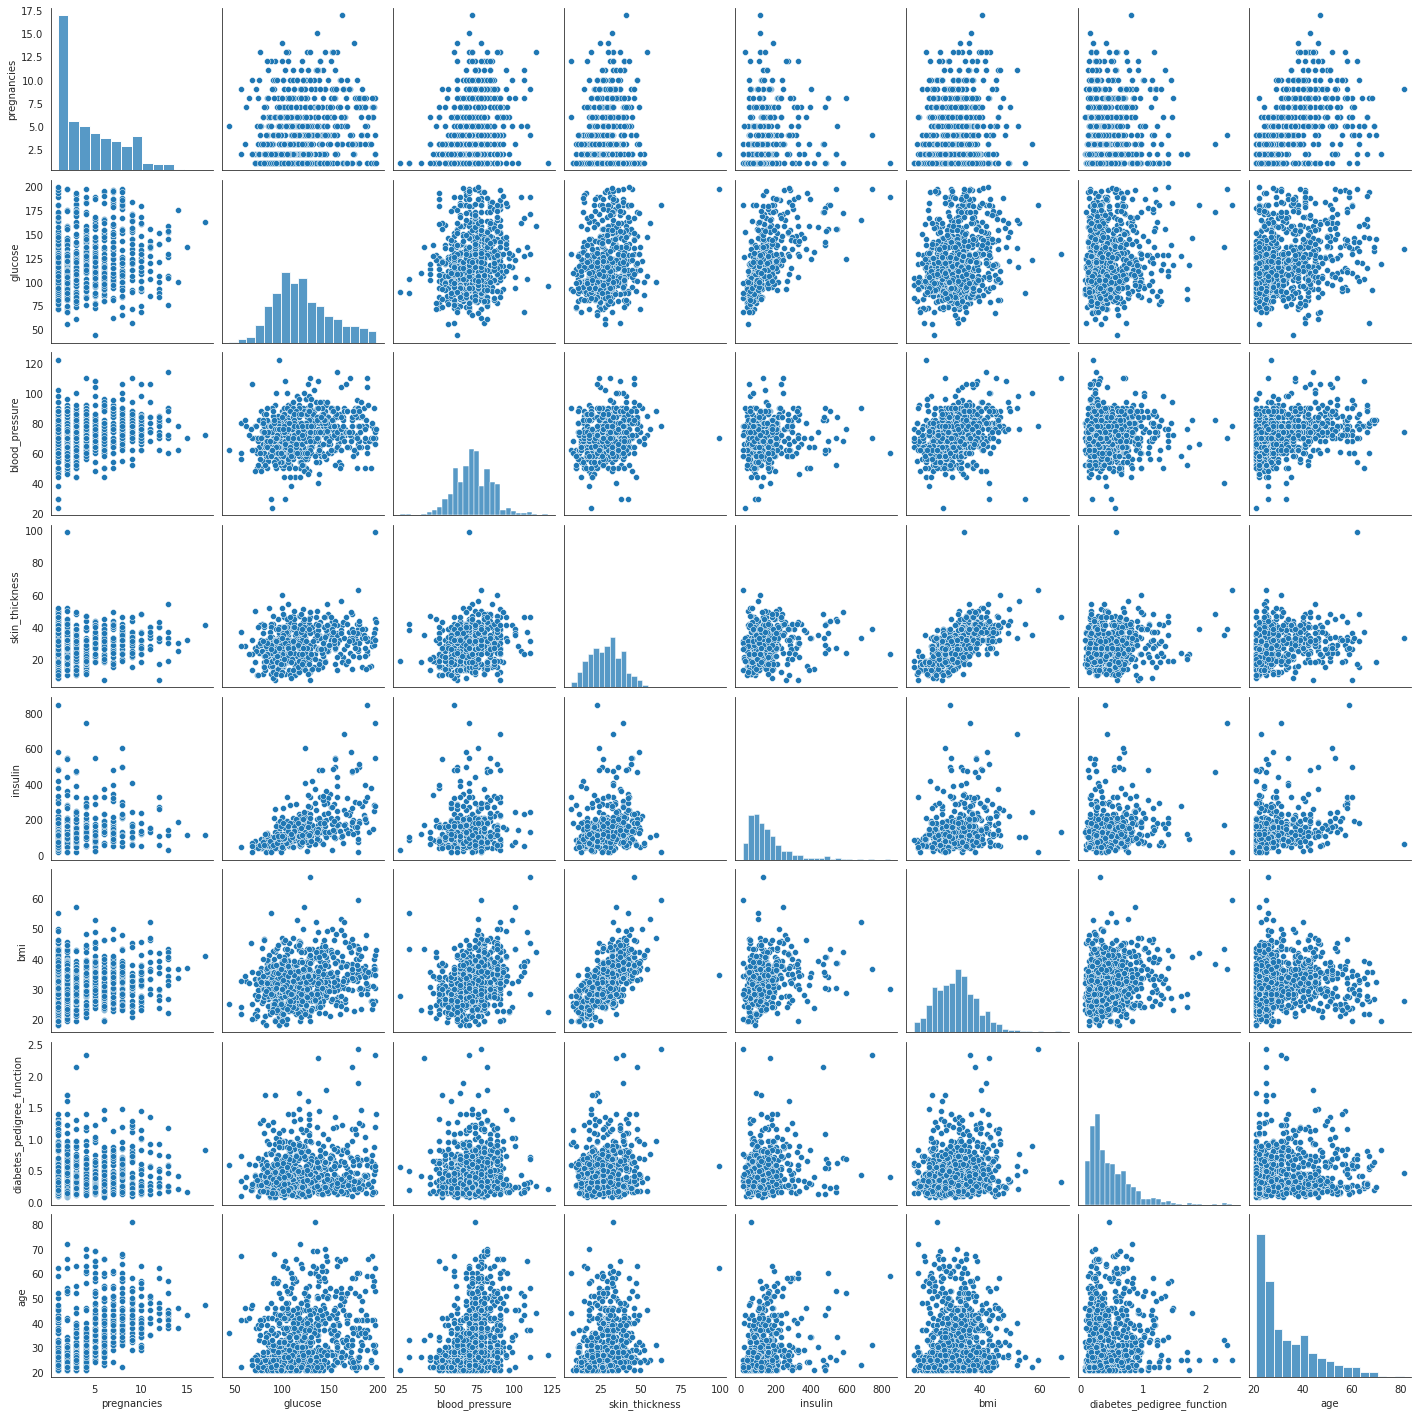

In [38]:
sns.pairplot(no_zeros);

Viendo estas gráficas podemos confirmar que los pares 'skin_thickness-bmi' y 'glucose-insulin' parecen estar suficientemente relacionados. 'pregnancies-age' no es tan clara en la visualización.

También podemos ver que en algunas de nuestras variables tenemos valores atípicos un poco extremos. Por ejemplo, en 'skin_thickness'. De hecho casi todas tienen algún valor que sobresale mucho.

Para volver a confirmar que dos variables están relacionadas o no habría que proceder de la siguiente manera:

Preguntarnos si estos valores atípicos son relevantes o podemos considerarlos anomalías (obviamente sólo un médico podría hacer esto efectivamente).
Si los consideramos anomalías entonces habría que removerlos de nuestro dataset.
Volver a cuantificar los coeficientes de correlación y las gráficas de pares para ver si algo cambio.
Sinceramente, no parece ser que los valores atípicos estén distorsionando demasiado nuestros cálculos, pero de todas maneras sería una buena práctica proceder de esta manera para confirmar nuestras hipótesis.

Por ejemplo, si elimino el valor atípico extremo de 'skin_thickness' realmente no cambian tanto nuestros coeficientes:

In [39]:
no_zeros = no_zeros[no_zeros['skin_thickness'] < 80]

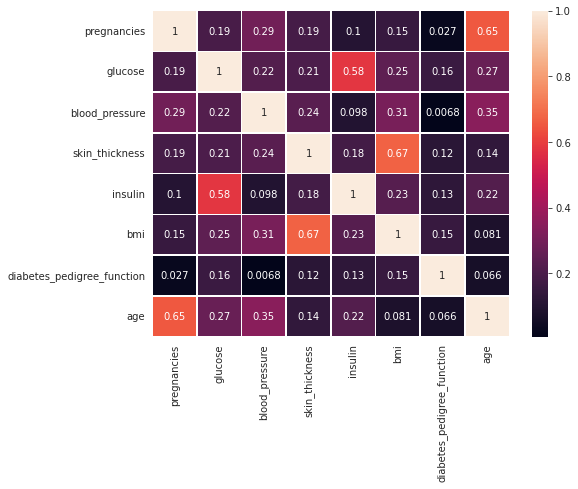

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(no_zeros.corr(), annot=True, linewidths=.5);

También es muy importante siempre estar considerando el tamaño de tu dataset. Hay veces que removemos tantos valores que podemos quedarnos prácticamente sin dataset, lo cual indicaría, claro está, que nuestro dataset no es bueno.

#Regresión lineal simple 

##a) Teoría

El coeficiente de correlación de Pearson cuantifica la fuerza y la dirección de la relación entre dos variables. La dirección se representa con el signo de nuestro resultado, mientras que la fuerza depende de qué tan cerca de -1 o 1 esté nuestro valor. Como ya dijimos antes, en el coeficiente de correlación de Pearson la variable x y la variable y son intercambiables.

La Regresión Linear Simple, en cambio, lo que intenta hacer es encontrar una función que nos permita predecir una de las variables a partir de la otra.

Lo primero que tenemos que hacer es decidir cuál va a ser nuestra variable independiente y cuál la dependiente. La variable independiente es la que se usa para predecir a la otra; le llamamos independiente porque podemos cambiarla sin condición alguna. La variable dependiente es la variable que queremos predecir; la llamamos dependiente porque estamos asumiendo que el valor que tome 'depende' del valor de la otra variable. Si usamos una gráfica de dispersión para graficar ambas variables, la variable independiente se grafica en el eje x y la dependiente en el eje y. Para ejemplificar, imaginemos que tenemos un dataset que se ve así:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


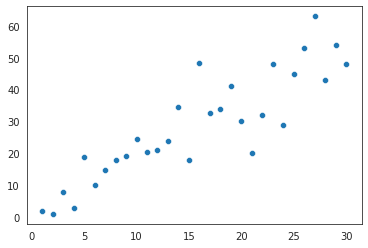

In [41]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48])
sns.scatterplot(serie_1, serie_2);

Lo primero que vale la pena hacer es sacar el coeficiente de correlación de Pearson entre ambas variables. Esto nos dará un indicador de la existencia (o inexistencia) de una relación entre las variables y de la fuerza de esta relación:

In [42]:
serie_1.corr(serie_2)

0.8849529343548095

Con un coeficiente como éste, es evidente que la relación entre las variables es fuerte. Vale la pena entonces intentar usar la Regresión Linear Simple para predecir la variable y a partir de la x.

Llamamos 'modelo' al conjunto de algoritmos y parámetros que determinan de qué manera buscar y encontrar la función predictiva.
En este caso nuestro modelo es una Regresión Linear Simple con ciertas características.
Entrenamos un modelo para obtener la función predictiva.
Esta función puede ser utilizada para construir una línea sobre un plano y representar visualmente la manera como nuestro modelo entrenado realiza las predicciones.
Una línea se ve así:

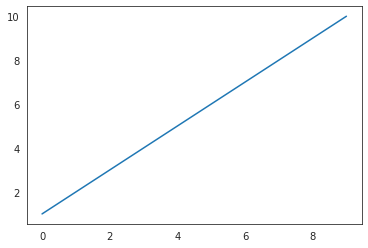

In [43]:
serie_3 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sns.lineplot(data=serie_3);

La ecuación de una línea recta como ésta tiene la siguiente forma:

y = mx + b

Entonces para predecir y tomamos nuestro valor x, lo multiplicamos por el valor m y le sumamos b. El proceso de entrenamiento de nuestro modelo lo que pretende es encontrar los valores más adecuados para m y b que minimicen nuestros errores de predicción.

Vamos a utilizar el modelo que viene incluido en la librería scikit-learn para entrenarlo:

In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression()

Usando nuestro modelo entrenado, usamos de nuevo nuestra variable x para intentar predecir y:



In [47]:
y_predict = lr.predict(serie_1.to_frame())

Graficamos ahora nuestros y originales (azul) y los y predecidos (naranja):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


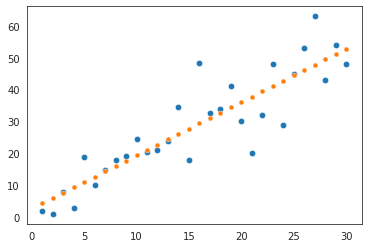

In [48]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25)

Como puedes ver, cada punto azul tiene su "correspondiente" punto naranja. Algunos puntos azules y naranjas quedan exactamente en el mismo lugar (la predicción fue correcta), mientras que algunos quedan algo lejos (la predicción no fue acertada). El margen de error se visualiza en esta siguiente gráfica como una serie de líneas verdes fragmentadas:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


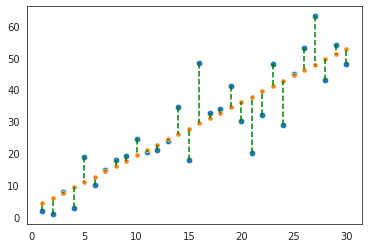

In [49]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25);
for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'g--')

Seguramente ya habrás notado que los puntos naranjas forman una línea:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


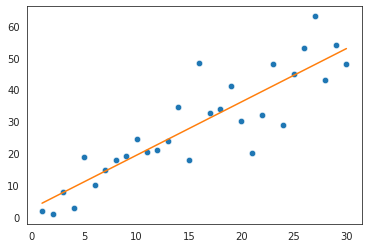

In [50]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

Podemos extraer la ecuación de la línea de nuestro modelo entrenado de esta manera:

In [51]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Y por lo tanto, nuestra función predictiva es la siguiente:

In [53]:
print(f'y = {coefficient} * x + {intercept}')

y = 1.6723248053392652 * x + 2.688965517241389


Podemos comprobarlo de esta manera

In [54]:
print(f'Valor de x: {serie_1[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * serie_1[10] + intercept}')

Valor de x: 11
Valor predecido por nuestro modelo: 21.084538375973306
Valor cuantificado directamente usando la funcion: 21.084538375973306


Para finalizar: ¿cómo cuantificamos con un valor la efectividad de nuestro modelo? Podemos usar el coeficiente de determinación o R2 (R al cuadrado). Este coeficiente nos dice qué proporción de la variabilidad de y puede ser explicada usando la variable y. En el caso de la Regresión Linear Simple, R2 se puede obtener elevando al cuadrado el coeficiente de correlación de Pearson:

In [57]:
print(f'R2: {np.power(serie_1.corr(serie_2), 2)}')

R2: 0.7831416960231877


Usando el método score de nuestro modelo, podemos obtener el coeficiente directamente de nuestro modelo entrenado:



In [ ]:
print(f'R2: {lr.score(serie_1.to_frame(), serie_2)}')

##b) Práctica
Vamos a ver un ejemplo práctico utilizando nuestro dataset anterior.

In [59]:
df.head()

,skin_thickness,bmi
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1


In [58]:
df = df[['skin_thickness', 'bmi']]

In [60]:
df.isna().sum()

skin_thickness    0
bmi               0
dtype: int64

In [61]:
df = df[df > 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


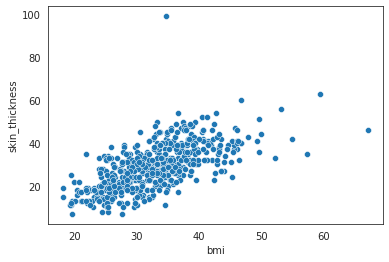

In [62]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [63]:
df = df[df['skin_thickness'] < 80]
df = df[df['bmi'] < 60]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


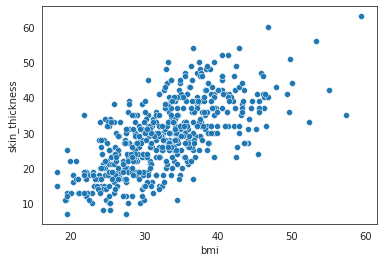

In [64]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [65]:
df = df.dropna()

In [66]:
df['bmi'].corr(df['skin_thickness'])

0.6752529282935311

In [68]:
lr = LinearRegression()
lr.fit(df['bmi'].to_frame(), df['skin_thickness'])

LinearRegression()

In [69]:
y_predict = lr.predict(df['bmi'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


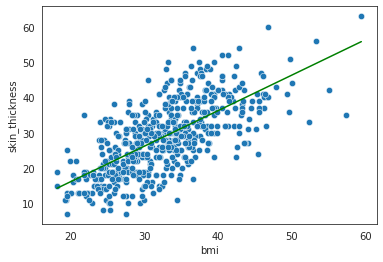

In [70]:
sns.scatterplot(df['bmi'], df['skin_thickness'], s=40);
sns.lineplot(df['bmi'], y_predict, color='g');

In [71]:
lr.score(df['bmi'].to_frame(), df['skin_thickness'])

0.4559665171689886

En este caso decimos entonces que nuestra variable 'bmi' explica el 45.6% de la variabilidad de nuestra variable 'skin_thickness'. Todavía tenemos algunos valores en ambas variables que tal vez podrían ser considerados valores atípicos, pero es difícil tomar esa decisión sin saber más al respecto del tema.

Este R2 no es maravilloso, pero tampoco es tan terrible. Recuerda que realizar predicciones en el mundo real es extremadamente difícil.